<a href="https://colab.research.google.com/github/JainAnki/ADSMI-Notebooks/blob/main/HR_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IIT Madras and TalentSprint
### Mini Project 5 : HR Analytics - Attrition

## Learning Objectives

At the end of the mini project, you will be able to -

* Get an understanding of the dataset.
* Perform Extensive EDA and Visualizations
* Handraft the raw data suitable for a ML problem
* Predict(Classify) the employee Attrition based on employee performance


Perform Exhaustive EDA and engineer the features to build a model on a training data that predicts (Classifies) whether an employee (from a test dataset) will quit the company or not.


## Information

### HR Analytics

In any organization, Human Resources (HR) plays the role of a backbone. The strength of the comapny's performance is dependant on the people who make up the various roles and departments. So, it is vital to monitor and make business decisions based on the employees' data.


HR Analytics is one of the latest yet a powerful domain that used the Data Science and Machine Learning. HR analytics is a broad term and has mutiple applications including, but not limited to the following

- Performance Analysis
- Attrition Analysis and Prediction
- Hiring Analytics
- Employee satisfaction and perk recommendation
- Skills assesment and team restructuring


### About the Dataset

This Mini-Project uses the Dataset from the [Kaggle Link](https://www.kaggle.com/code/whale9490/ibm-hr-analytics-employee-attrition-performance).

This Mini-Project is based on the HR Analytics.
The goal of this project is to use the above dataset to study the performance and predict the disssatisfied Employees who are most probable to quit the company.

We have 1470 employees data with 35 fields that are self-explanatory. 
The fields (variables) are a mix of categorical and numerical data.

Except the `Attrition`, all other fields are feature variables. The fields are sorted in alphabetical order as follows:

- `Age`
- **`Attrition`** - *TARGET VARIABLE*
- `BusinessTravel`
- `DailyRate`
- `Department`
- `DistanceFromHome`
- `Education`
- `EducationField`
- `EmployeeCount`,
- `EmployeeNumber`
- `EnvironmentSatisfaction`
- `Gender`
- `HourlyRate`,
- `JobInvolvement`
- `JobLevel`
- `JobRole`
- `JobSatisfaction`,
- `MaritalStatus`
- `MonthlyIncome`
- `MonthlyRate`
- `NumCompaniesWorked`
- `Over18`
- `OverTime`
- `PercentSalaryHike`
- `PerformanceRating`,
- `RelationshipSatisfaction`
- `StandardHours`
- `StockOptionLevel`,
- `TotalWorkingYears`
- `TrainingTimesLastYear`
- `WorkLifeBalance`,
- `YearsAtCompany`
- `YearsInCurrentRole`
- `YearsSinceLastPromotion`
- `YearsWithCurrManager`

**Python Packages used:**  

* [`Google.colab`](https://colab.research.google.com/notebooks/io.ipynb) for linking the notebook to your Google-drive
* [`Pandas`](https://pandas.pydata.org/docs/reference/index.html) for data frames and easy to read csv files  
* [`Numpy`](https://numpy.org/doc/stable/reference/index.html#reference) for array and matrix mathematics functions  
* [`sklearn`](https://scikit-learn.org/stable/user_guide.html) for the pre-processing data, building ML models, and performance metrics
* [`seaborn`](https://seaborn.pydata.org/) and [`matplotlib`](https://matplotlib.org/) for plotting


## Importing the packages

In [ ]:
### The required libraries and packages ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from google.colab import drive
import os
from tqdm import tqdm
import time
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import Normalizer

## Importing the Data

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = 'drive/MyDrive/Colab Notebooks/M3_MP5_HRA/'
# path = 'drive/MyDrive/<YOUR FOLDER NAME AS IT APPEARS ON GOOGLE DRIVE>'

df_raw = pd.read_csv(path+'Employee_Attrition.csv')
print(df_raw.shape)
df_raw.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df = df_raw.copy()
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.iloc[:3, :10]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4


In [ ]:
df.iloc[:3, 10:20]

,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate
0,2,Female,94,3,2,Sales Executive,4,Single,5993,19479
1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907
2,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396


In [ ]:
df.iloc[:3, 20:28]

,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel
0,8,Y,Yes,11,3,1,80,0
1,1,Y,No,23,4,4,80,1
2,6,Y,Yes,15,3,2,80,0


In [ ]:
df.iloc[:3, 28:]

,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,8,0,1,6,4,0,5
1,10,3,3,10,7,1,7
2,7,3,3,0,0,0,0


## Graded Exercises (10 points)

**Exercises 1 to 4** (7 points)

deal with the data, the basic anslysis, and its visualization and data preparation of **FEATURES** only.

**Exercises 5 & 6** (3 points)

Exercise 5 and 6 deal with the classification model and its performance Metrics.

As you can see, this Mini-Project is centered around the data, rather than the algorithms

### Exercise 1 (1 point): Basic EDA

- Check the shape of the data
- Check the nulls present in each field
- Check the unique number of entries per field
- Check the statistics of the data for each column
- Drop the features that are redundant and that have constant values throughout all rows


**Hint** : Use the `pandas` module

In [ ]:
# Check the shape of the data
print(df.shape)

(1470, 35)


In [ ]:
# Check the nulls present in each field
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# Check the unique number of entries per field
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
# Check the statistics of the data for each column
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Exercise 2 (2 points): Features Visualization - 1

Plot the data distribution to see how the data is distributed (ex: Normal, Uniform, Poisson, Skewed-Normal etc.)

1. Determine the variables that are best viewed with:
 - Histograms (Choose an appropriate bin size/ number of bins if the default does not give good plot)
 - Bar plot 
 - Categorical Plot (Box/Violin/Swarm)

2. Display using the appropriate plotting corresponding to the feature variables.

**Hints**: Refer to the `seaborn` or `matplotlib` to achieve the respective tasks

**Optional**:
It is preferable to have all the 35 variables **in a single picture of 6x6 grid** (subplot) format , rather than to scroll 35 images. Adjust the setting like spacings, font size, aspect ratio, choice of colors to produce a visually appealing picture that appears on a professional dashboard based websites as in some of the links below:

[Image-1](https://docs.microsoft.com/en-us/power-bi/create-reports/media/service-dashboards/power-bi-dashboard2.png)

[Image-2](https://d22e4d61ky6061.cloudfront.net/sites/default/files/full-width-stripy-socks/scrnshot-infrastructure-complete.png)

[Image-3](https://www.google.com/url?sa=i&url=https%3A%2F%2Fmjsharma.github.io%2FAzureMonitorDashboards%2F&psig=AOvVaw1Lt7Zus-l0yXWJ_YIg4eP4&ust=1649836098729000&source=images&cd=vfe&ved=2ahUKEwjTqIvGhI73AhVEQ2wGHfLsBT0QjRx6BAgAEAk)

Atleast try to present in 3 pictures for the Histograms/Box/Categorical Plots

In [ ]:
df_counts = df.nunique().to_frame().reset_index().rename(columns={"index":"features", 0:"counts"})
df_counts = df_counts.sort_values("counts").reset_index(drop=True)

df_types = df.dtypes.to_frame().reset_index().rename(columns={"index":"features", 0:"type"})
df_types = df_types.sort_values("type").reset_index(drop=True)

df_combined = pd.merge(df_counts, df_types, on="features")
df_combined = df_combined[df_combined["counts"]>1]
df_combined = df_combined[df_combined["features"] != "EmployeeNumber"]
df_combined = df_combined.reset_index(drop=True)
df_combined

,features,counts,type
0,Gender,2,object
1,Attrition,2,object
2,PerformanceRating,2,int64
3,OverTime,2,object
4,MaritalStatus,3,object
5,Department,3,object
6,BusinessTravel,3,object
7,StockOptionLevel,4,int64
8,EnvironmentSatisfaction,4,int64
9,JobInvolvement,4,int64


In [ ]:
# List the Variables that would be best described by Histogram
c1 = df_combined["counts"]>10
c2 = df_combined["type"]=="int64"
condition_hist = np.logical_and(c1, c2)
features_histogram  = sorted(df_combined[condition_hist]["features"].to_list())
print(len(features_histogram))
features_histogram

12


['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
# List the Variables that would be best described by Bar Plots
c1 = df_combined["counts"]>1
c2 = df_combined["counts"]<11
# c3 = df_combined["type"]=="int64"
# condition_bar = np.logical_and(np.logical_and(c1, c2), c3)
condition_bar = np.logical_and(c1, c2)
features_bar  = sorted(df_combined[condition_bar]["features"].to_list())
print(len(features_bar))
features_bar

19


['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [ ]:
# # List the Variables that would be best described by Box/Violin/Swarm Plots
# c1 = df_combined["counts"]>1
# c2 = df_combined["counts"]<11
# c3 = df_combined["type"]=="object"
# condition_cat = np.logical_and(np.logical_and(c1, c2), c3)
# features_cat  = sorted(df_combined[condition_cat]["features"].to_list())
# print(len(features_cat))
# features_cat

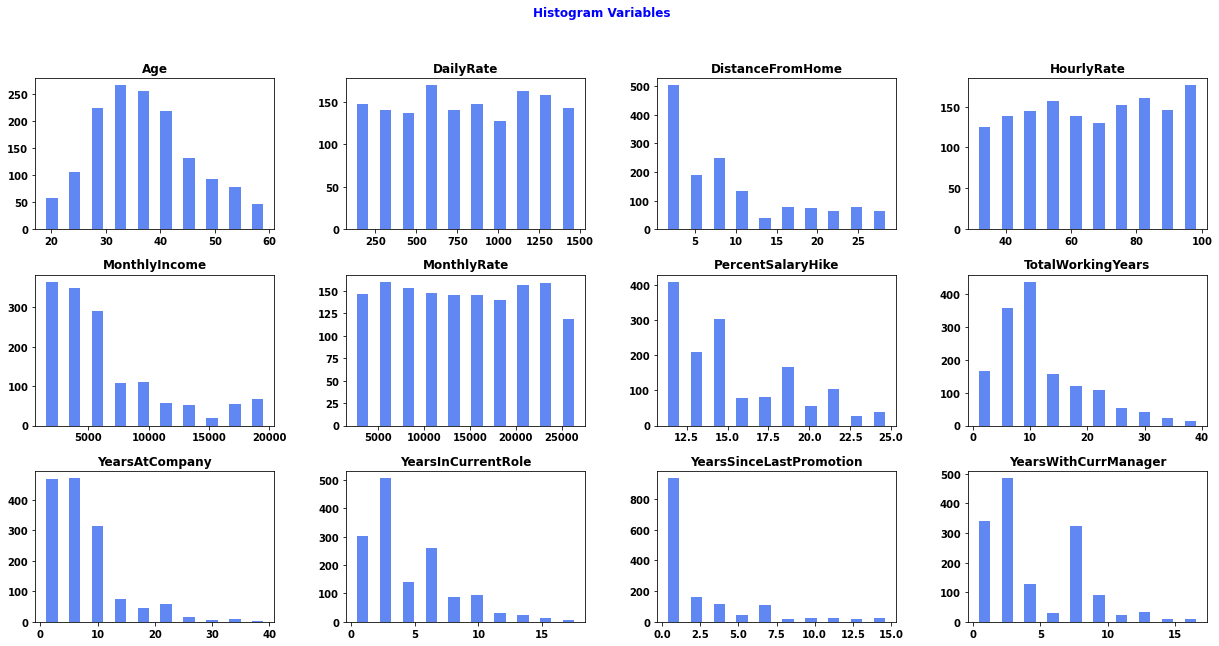

In [ ]:
# Plot the histograms
plt.figure(figsize=(21,10))
nrows = 3
ncols = 4
counter_hist = 0
for nth_row in range(nrows):
  for nth_col in range(ncols):

    if counter_hist<len(features_histogram): # To prevent Error
      feature = features_histogram[counter_hist]

      plt.subplot(nrows, ncols, counter_hist+1)
      plt.hist(df[feature], color="#6188f2", rwidth=0.5)
      plt.xticks(fontsize=10, weight='bold')
      plt.yticks(fontsize=10, weight='bold')
      plt.title(feature, color='k', weight='bold')
      counter_hist = counter_hist+1

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.suptitle("Histogram Variables", color='blue', weight='bold')
plt.show()

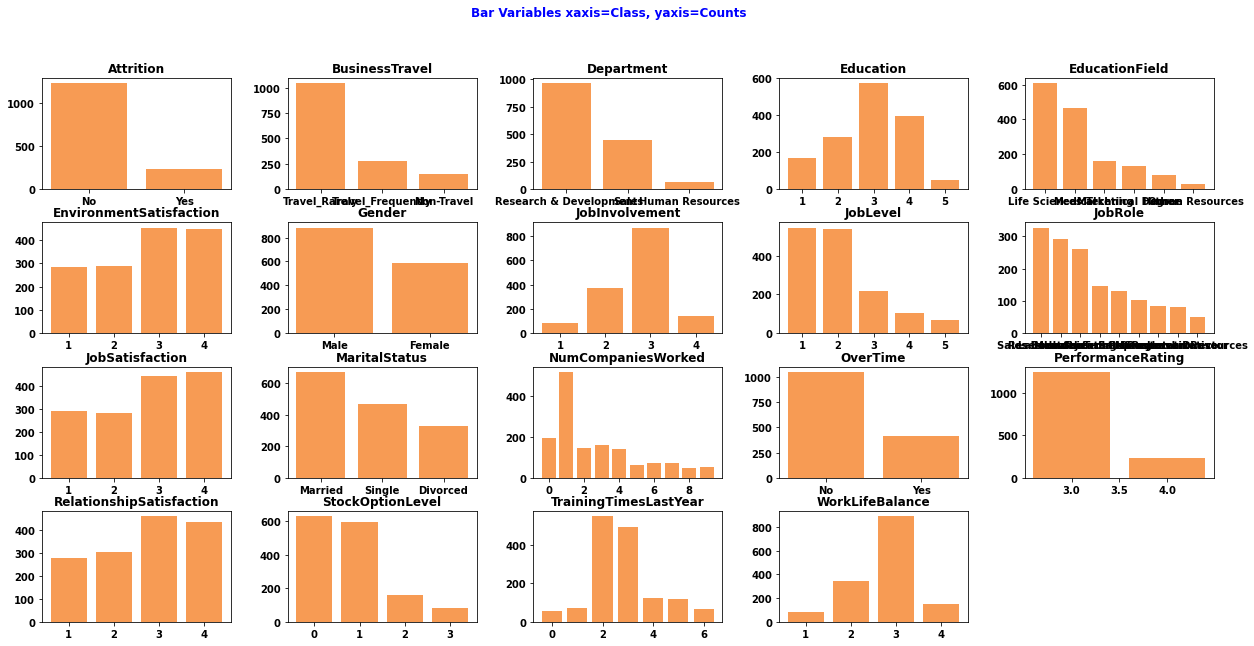

In [ ]:
# Plot the bar Plots
plt.figure(figsize=(21,10))
nrows = 4
ncols = 5
counter_bar = 0
for nth_row in range(nrows):
  for nth_col in range(ncols):

    if counter_bar<len(features_bar): # To prevent Error
      feature = features_bar[counter_bar]

      plt.subplot(nrows, ncols, counter_bar+1)
      df_mini = df[feature].value_counts().to_frame().reset_index().rename(columns={"index":"Cats"})
      plt.bar(df_mini["Cats"], df_mini[feature], color="#f79b54")
      plt.xticks(fontsize=10, weight='bold')
      plt.yticks(fontsize=10, weight='bold')
      plt.title(feature, color='k', weight='bold')
      counter_bar = counter_bar+1

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.suptitle("Bar Variables xaxis=Class, yaxis=Counts", color='blue', weight='bold')
plt.show()

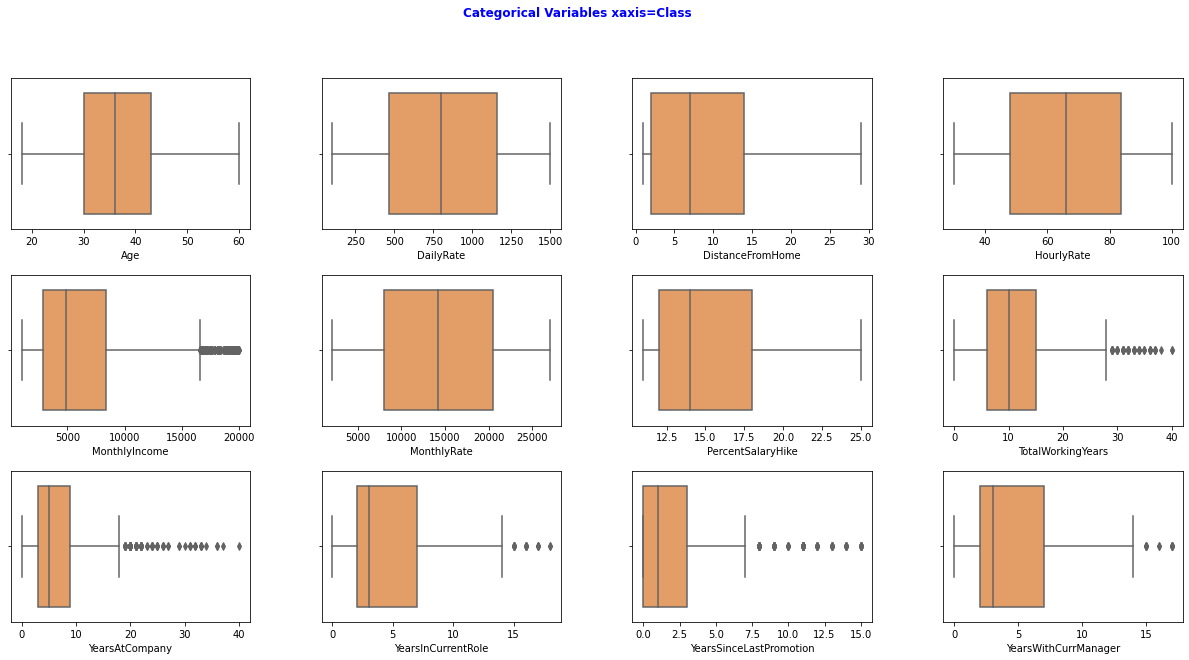

In [ ]:
# Plot the Categorical Plots
nrows = 3
ncols = 4
fig, axes = plt.subplots(nrows, ncols, figsize=(21,10))
fig.suptitle("Categorical Variables xaxis=Class", color='blue', weight='bold')

import seaborn as sns

counter_hist = 0
for nth_row in range(nrows):
  for nth_col in range(ncols):

    if counter_hist<len(features_histogram): # To prevent Error
      feature = features_histogram[counter_hist]

      ax=axes[0]
      sns.boxplot(x=df[feature], ax=axes[nth_row][nth_col], color="#f79b54")
      counter_hist = counter_hist+1

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

### Exercise 3 (2 points): Feature Engineering 

- Fill the missing values:
  - numerical: With mean
  - categorical: with `Others`/Suitable name as appropriate
- Identify and list the Categorical features which needs to be bucketized in discrete Bins
- Convert the Text categories into Numerical Categories using `pandas`'s '`get_dummies`'
- Ensure that entire dataset has **Numerical values Only**

In [ ]:
# Check for Null and if any, replace with mean
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
condition = df_combined["type"] == "object"
cols_text = list(df_combined["features"][condition].values)

In [ ]:
df_fe = df.copy().drop(columns=["Over18"])
df_fe.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [ ]:
# Convert the Text categories into Numerical Categories
le = LabelEncoder()

for column in cols_text:
  df_fe[column] = le.fit_transform(df_fe[column])
df_fe.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7


In [ ]:
# Identify and list the features and target which needs to be bucketized in discrete Bins
cols_y = "Attrition"
cols_X = list(df_fe.columns)
cols_X.remove(cols_y)

In [ ]:
print(cols_X)

['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [ ]:
# Normalization
df_fe[cols_X] = Normalizer().fit_transform(df_fe[cols_X]) 
df_fe.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.002009,1,0.000098,0.053992,0.000098,0.000049,0.000098,0.000049,0.000049,0.000098,...,0.000049,0.003920,0.000000,0.000392,0.000000,0.000049,0.000294,0.000196,0.000000,0.000245
1,0.001927,0,0.000039,0.010971,0.000039,0.000315,0.000039,0.000039,0.000079,0.000118,...,0.000157,0.003146,0.000039,0.000393,0.000118,0.000118,0.000393,0.000275,0.000039,0.000275
2,0.010676,1,0.000577,0.396178,0.000289,0.000577,0.000577,0.001154,0.001154,0.001154,...,0.000577,0.023084,0.000000,0.002020,0.000866,0.000866,0.000000,0.000000,0.000000,0.000000
3,0.001411,0,0.000043,0.059531,0.000043,0.000128,0.000171,0.000043,0.000214,0.000171,...,0.000128,0.003421,0.000000,0.000342,0.000128,0.000128,0.000342,0.000299,0.000128,0.000000
4,0.001588,0,0.000118,0.034764,0.000059,0.000118,0.000059,0.000176,0.000412,0.000059,...,0.000235,0.004706,0.000059,0.000353,0.000176,0.000176,0.000118,0.000118,0.000118,0.000118


In [ ]:
# Ensure that entire dataset has Numerical values Only
df_fe.dtypes

Age                         float64
Attrition                     int64
BusinessTravel              float64
DailyRate                   float64
Department                  float64
DistanceFromHome            float64
Education                   float64
EducationField              float64
EmployeeCount               float64
EmployeeNumber              float64
EnvironmentSatisfaction     float64
Gender                      float64
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                     float64
JobSatisfaction             float64
MaritalStatus               float64
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
OverTime                    float64
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            float64
TotalWorkingYears           

### Exercise 4 (2 points): Data Preparation

 - Plot an annotated heatmap of the correlation
 - Drop highly correlated variables, if any
 - Split the data into training and testing


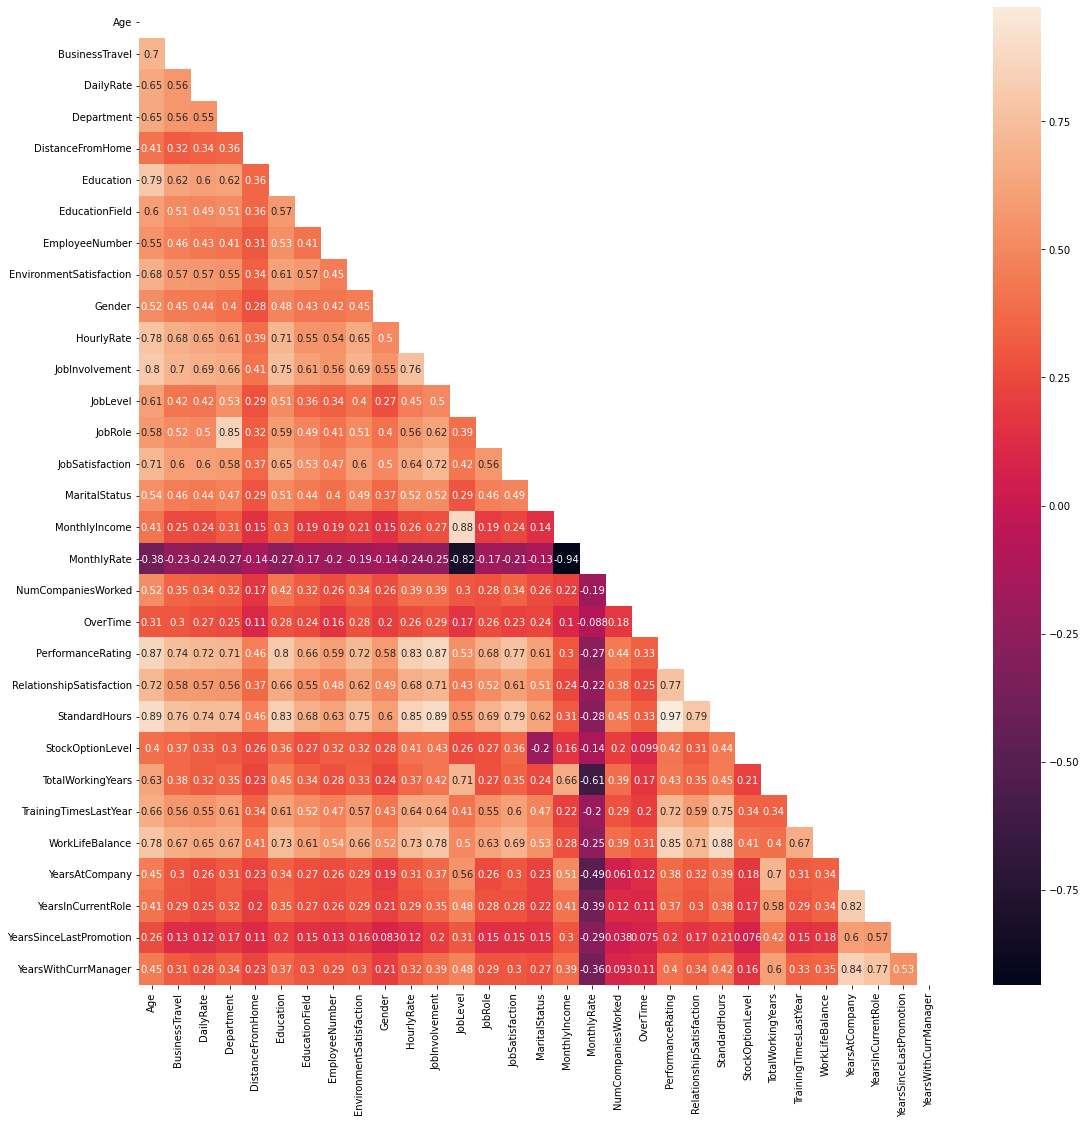

In [ ]:
# Plot an annotated heatmap of the correlation
plt.figure(figsize=[18,18])

# Drop highly correlated variables, if any
df_corr = df_fe[cols_X].corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr, annot=True, mask = mask)

In [ ]:
drop_cols = ['EmployeeCount', 'PercentSalaryHike']
df_fe = df_fe.drop(columns=drop_cols )
df_fe.shape

(1470, 32)

In [ ]:
# Split the data into training and testing


X = df_fe[cols_X]
y = df_fe[cols_y]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)


In [ ]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

### Exercise 6 (2 point) : Building ML models

- Build any 3 `sklearn`'s classifiers of your choice
- Train and fit on the Training Data
- Predict on the Test Data

**Hint**: Train the model and predict on seperate cells. It will save time debugging.

In [ ]:
# YOUR CODE HERE - MODEL 1

from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(class_weight='balanced').fit(X_train, y_train)
ypred1 = clf1.predict(X_test)
clf1.score(X_test, y_test)

0.5308641975308642

In [ ]:
# YOUR CODE HERE - MODEL 2

from sklearn.naive_bayes import GaussianNB
clf2 = GaussianNB().fit(X_train, y_train)
ypred2 = clf2.predict(X_test)
clf2.score(X_test, y_test)

0.7880658436213992

In [ ]:
# YOUR CODE HERE - MODEL 3

from sklearn.svm import SVC
clf3 = SVC(gamma='auto', kernel='linear').fit(X_train, y_train)
ypred3 = clf3.predict(X_test)
clf3.score(X_test, y_test)

0.8724279835390947

### Exercise 6 (1 point) : Attrition Analysis

- Write a function to Compute the Classification metrics. 

The arguments of the function will be the true and predicted values of the `y` variable:
  - Print the Classification Report, 
  - Print the Confusion Matrix, 
  - Print the AUC metrics (or Plot ROC curves)
- Explain why one model behaves better than the other(s) in terms of Accuracy, Precision, Recall and F1-Score



In [ ]:
def att_analysis(ytrue, ypred):
  # Print the Classification Report
  print("="*30)
  print("CLASSIFICATION REPORT = ")
  print("="*30)
  print(classification_report(ytrue, ypred, target_names=["No", "Yes"]))

  # Print the Confusion Matrix
  print("="*30)
  print("CONFUSION MATRIX = ")
  print("="*30)
  print(confusion_matrix(ytrue, ypred))

  # Print the AUC metrics (or Plot ROC curves)
  print("="*30)
  print("AUC FOR CLASS 0 (NO) = ")
  print("="*30) 
  fpr0, tpr0, thresholds0 = metrics.roc_curve(ytrue, ypred, pos_label=0)
  print(metrics.auc(fpr0, tpr0))

  # Print the AUC metrics (or Plot ROC curves)
  print("="*30)
  print("AUC FOR CLASS 1 (YES) = ")
  print("="*30)   
  fpr1, tpr1, thresholds1 = metrics.roc_curve(ytrue, ypred, pos_label=1)
  print(metrics.auc(fpr1, tpr1))

In [ ]:
# CLASSIFICATION METRICS- MODEL1
att_analysis(y_test, ypred1)

CLASSIFICATION REPORT = 
              precision    recall  f1-score   support

          No       0.92      0.51      0.65       424
         Yes       0.17      0.69      0.27        62

    accuracy                           0.53       486
   macro avg       0.54      0.60      0.46       486
weighted avg       0.82      0.53      0.61       486

CONFUSION MATRIX = 
[[215 209]
 [ 19  43]]
AUC FOR CLASS 0 (NO) = 
0.3996880706025563
AUC FOR CLASS 1 (YES) = 
0.6003119293974437


In [ ]:
# CLASSIFICATION METRICS- MODEL2
att_analysis(y_test, ypred2)

CLASSIFICATION REPORT = 
              precision    recall  f1-score   support

          No       0.88      0.87      0.88       424
         Yes       0.20      0.23      0.21        62

    accuracy                           0.79       486
   macro avg       0.54      0.55      0.55       486
weighted avg       0.80      0.79      0.79       486

CONFUSION MATRIX = 
[[369  55]
 [ 48  14]]
AUC FOR CLASS 0 (NO) = 
0.45195526475958614
AUC FOR CLASS 1 (YES) = 
0.5480447352404139


In [ ]:
# CLASSIFICATION METRICS- MODEL3
att_analysis(y_test, ypred3)

CLASSIFICATION REPORT = 
              precision    recall  f1-score   support

          No       0.87      1.00      0.93       424
         Yes       0.00      0.00      0.00        62

    accuracy                           0.87       486
   macro avg       0.44      0.50      0.47       486
weighted avg       0.76      0.87      0.81       486

CONFUSION MATRIX = 
[[424   0]
 [ 62   0]]
AUC FOR CLASS 0 (NO) = 
0.5
AUC FOR CLASS 1 (YES) = 
0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
